#  Machine learning project notebook

### Student: G00219132 Susan Hudson - Module: Machine Learning & Statistics, GMIT

### Notebook structure

The notebook is split up into the following sections which are based on the project statement requirements.

* Section One - General setup and importation of necessary python libraries/packages and dataset
* Section Two - Descriptive Statistics
* Section Three - Inferential Statistics
* Section Four - Predictive Statistics
* Section Five - references and conclusion

## Section One - Importing libraries and dataset

In [4]:
# Import all necessary python packages for this vnotebook

import matplotlib.pyplot as plt 
#Matplotlib is a Python plotting library and Pyplot is a matplotlib module which provides a MATLAB type interface.
plt.rcParams['figure.figsize'] = [10, 6]  #sets figure sizes for plots
%matplotlib inline  
#command abovr ensures plots display correctly in the notebook
import seaborn as sns  #Seaborn is a Python package used for plotting data.
import pandas as pd  #Pandas is a Python package for use with data frames.
import scipy.stats as ss #statistical functions package
import numpy as np #NumPy is a Python package for mathematical computing
import sklearn.datasets #dataset location
import keras as kr #deep learning library - used for predictive neural networks 

Using TensorFlow backend.


In [5]:
# dataset is imported and converted to a pandas dataframe
sklearn.datasets.load_boston
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

##  Section Two - Descriptive Statistics

Descriptive Statistics looks at sunmary statistics for the population sample [1], to get a 'feel' for the data. I have chosen both visual and quamtitative analysis methods. 
 

In [3]:
# check data set shape and print first five rows 
print(boston.data.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
#a table of the summary statistics for all columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
# below outines the characteristcs of the dataset and explains what each variable represents in the dataset.
# Note - this dataset is from the 1970s and some attributes are a reflection of those times, for the purpose of the project
# I imported the dataset as a whole but will not be considering some of the variables when doing evaluations of data subsets!

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Distribution of Median Values

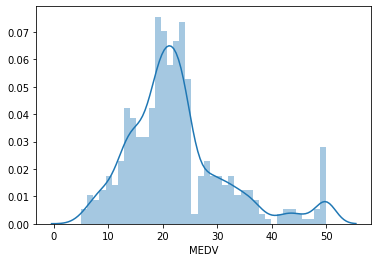

In [11]:
#below I am looking at the distribution of the target variable, MEDV

sns.distplot(df["MEDV"], bins=40)
plt.show()


The plot of Median Value shows a mainly normal distribution. It looks like there is some sort of price capping /banding as there seem to be a disproportionate number of properties with median value 50. 
The box plot of MEDV below appears to back up this opinion. 

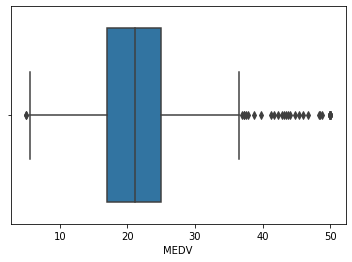

In [15]:
# a box plot of MEDV to look at the shape
sns.boxplot(df.MEDV)

#### Correlation
I then looked at whether there was much, or any correlation between the individual dataset variables and in particular whether any strong correlations existed between target variable MEDV and other variables. 

I did both a correlarion heatmap for a visual display and a correlaion table. 

Correlation is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. A coefficient close to  1 would indicate that the two change in the same direction, e.g as one increases the other increases, as one decreases the other decreases. A value close to -1 indicates a strong negative correlation, e.g as one variable increases the other decreases. 

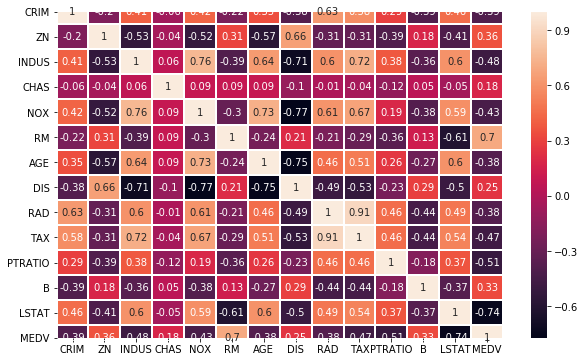

In [9]:
# a correlation heatmap of the dataset

correlation_heatmap = df.corr().round(2)
fig, ax = plt.subplots(figsize=(10,6))   
sns.heatmap(correlation_heatmap, annot=True,linewidths= 1, ax=ax)

plt.show()

In [10]:
# correlation table for the dataset
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Looking at the correlation heatmap/table the strongest correlations with MEDV are a positive correlation with RM, average number of rooms per dwelling and a negative correlation with LSTAT % lower status of the population.
This would make sense as one would imagine that house prices are higher when they are larger and also that they would be lower in poorer areas. This is supported by the negative correlation between LSTAT and RM, the higher the % of 'lower status' the lower the number of rooms. There is also a negative correlation with PTRATIO pupil-teacher ratio by town. It appears that the higher the PTRATIO the lower the MEDV This could imply that areas of lower socio economic status would have higher PTRATIO, it could be attributed to funding or even orevalence of orivate schools in more affluent areas. The posive correlation between LSTAT and PTRATIO could support this observation. 

#### Distribution plots
Below are distribution plots for each variable. Some appear skewed, CRIM, ZN, AGE for example. RM and MEDV are normally distributed.  As CHAS is categorical the distribution shows merely the counts for each value, 1 or 0, worth noting that there are a far greated number at 0. 

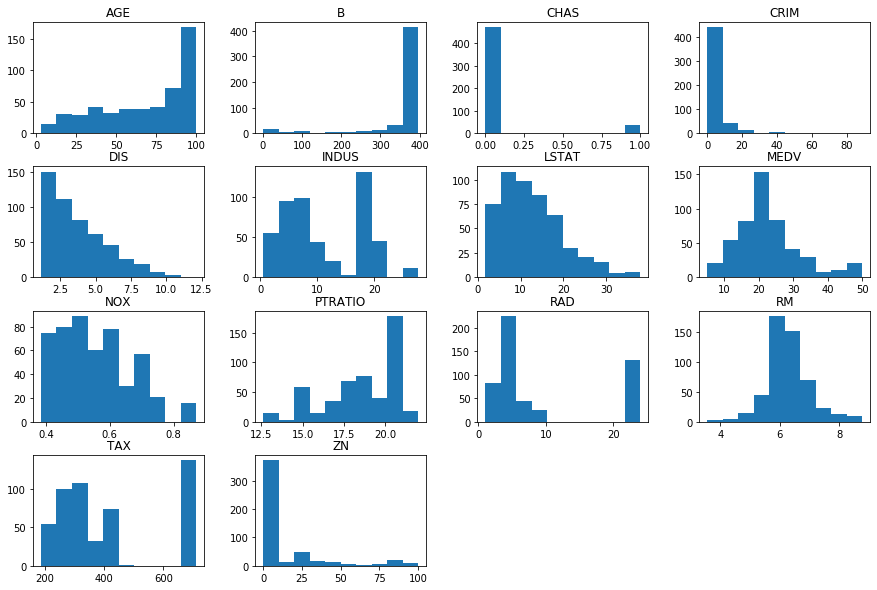

In [24]:
df.hist(bins=10, figsize=(15,10), grid=False)
plt.show()

## Section Three - Inferential Statistics

Inferential statistics looks at the sample and infers trends about the larger population from which the sample was drawn. Where populations are large it would be impossible to get data for the entire population so inferences are made based on the statistical sample. The project brief was to analyse whether there was a sigificant difference in median house prices between houses along the Charles river and those that aren't. 

To do this I decided to do a two sample t test and create two subsets to do a t test to see whether the mean of median values is the same for houses bordering the river and houses not near the river. The null hypothesis I am testing being that there is no difference in the average median value of houses bordering the river and houses not near the river.

The alternative hypothesis being that there is a difference in median values of houses bordering the river and houses not near the river.

In [47]:
# create two subsets to do a t test dfnear, houses bordering the river, dffar houses away from the river

dfnear =  df[(df['CHAS'] == 1.0)]
dfnear.reset_index(inplace= True)
#print ( dfnear)


dffar =  df[(df['CHAS'] == 0.0)]
dffar.reset_index(inplace= True)
#print(dffar)


from scipy.stats import ttest_ind
n =dfnear['MEDV']
f =dffar['MEDV']
result = ss.ttest_ind(n,f)
print('t test result for CHAS variable:  ', result)
# result obtained causes me to reject the hypothesis

t test result for CHAS variable:   Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


The result obtained causes me to reject the hypothesis and conclude that the mean of median value for houses along teh river is not equal to the mean of median values of houses away from the river. below I took a further look at the two subsets of data for CHAS. I am not convinced that the t test is of any value as I don't feel that the data follows the required conitions for being approximately normal [2]. The sample awaty from the river is probably OK but those near the river are a bimodal distribution with outliers, the 'capped' 50k values. 

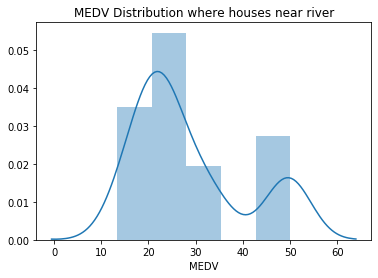

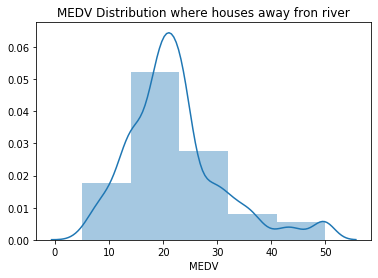

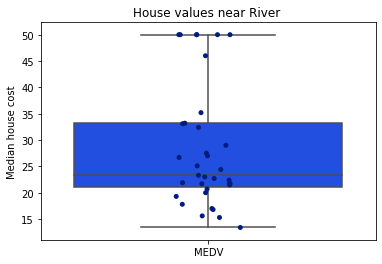

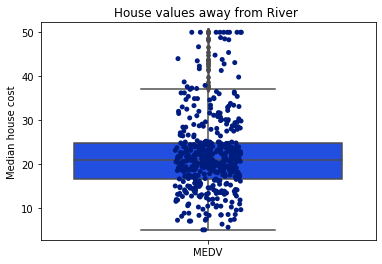

In [54]:
# distribution plots

sns.distplot(dfnear["MEDV"], bins=5).set_title ("MEDV Distribution where houses near river")
plt.show()
sns.distplot(dffar["MEDV"], bins=5).set_title ("MEDV Distribution where houses away fron river")
plt.show()

#box plot with stripplot overlaid to show data points
df4 = pd.DataFrame(data = dfnear, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4), palette="bright").set_title("House values near River ")
sns.stripplot(x="variable", y="value", data= pd.melt(df4), palette="dark").set_title("House values near River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

#box plot with stripplot overlaid to show data points
df5 = pd.DataFrame(data = dffar, columns = [ 'MEDV'] )
sns.stripplot (x="variable", y="value", data= pd.melt(df5), palette="dark").set_title("House values away from River ")
sns.boxplot(x="variable", y="value", data= pd.melt(df5), palette="bright").set_title("House values away from River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

The result of #note: not really sure this is of any value as within each subset will be other variables that have a greater impact on price
for example - number of rooms may be influencing price

## predictive

Build a neural network using keras and splitting the data into train (80%) and test (20%).

The following is my planned approach: 
build a neural network and train on all variables, 
look at some pre processing of data and again train on all variables. Reduce the number of inputs and repeat the above approach.

In [44]:
# check data types 
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### Select all values except MEDV as inputs and MEDV as output

In [52]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]


### build neural network model

In [72]:
from sklearn.model_selection import train_test_split 
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
#m.add(layers.Dense(52, activation='relu', input_dim =13))
#m.add(Dense(40,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
m.add(layers.Dense(39, activation='relu', input_dim =13))
m.add(layers.Dense(39, activation='relu'))
#m.add(layers.Dense(1,))
#m.add(Dense(40,kernel_initializer='random_uniform',activation='relu',use_bias=False))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))

m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
m.fit(x_train, y_train, epochs=1000, batch_size=506)

Epoch 1/1000
404/404 [==============================] - 0s 10us/step - loss: 2.7537 - accuracy: 0.0322
Epoch 2/1000
404/404 [==============================] - 0s 7us/step - loss: 2.8963 - accuracy: 0.0223
Epoch 3/1000
404/404 [==============================] - 0s 5us/step - loss: 2.9486 - accuracy: 0.0223
Epoch 4/1000
404/404 [==============================] - 0s 5us/step - loss: 2.6629 - accuracy: 0.0272
Epoch 5/1000
404/404 [==============================] - 0s 5us/step - loss: 2.4245 - accuracy: 0.0371
Epoch 6/1000
404/404 [==============================] - 0s 7us/step - loss: 2.4515 - accuracy: 0.0421
Epoch 7/1000
404/404 [==============================] - 0s 5us/step - loss: 2.4838 - accuracy: 0.0470
Epoch 8/1000
404/404 [==============================] - 0s 2us/step - loss: 2.3625 - accuracy: 0.0421
Epoch 9/1000
404/404 [==============================] - 0s 2us/step - loss: 2.2777 - accuracy: 0.0396
Epoch 10/1000
404/404 [==============================] - 0s 2us/step - loss: 2.35

Epoch 81/1000
404/404 [==============================] - 0s 5us/step - loss: 1.9662 - accuracy: 0.0545
Epoch 82/1000
404/404 [==============================] - 0s 7us/step - loss: 1.9649 - accuracy: 0.0545
Epoch 83/1000
404/404 [==============================] - 0s 7us/step - loss: 1.9641 - accuracy: 0.0545
Epoch 84/1000
404/404 [==============================] - 0s 12us/step - loss: 1.9633 - accuracy: 0.0545
Epoch 85/1000
404/404 [==============================] - 0s 5us/step - loss: 1.9623 - accuracy: 0.0520
Epoch 86/1000
404/404 [==============================] - 0s 13us/step - loss: 1.9613 - accuracy: 0.0520
Epoch 87/1000
404/404 [==============================] - 0s 5us/step - loss: 1.9603 - accuracy: 0.0545
Epoch 88/1000
404/404 [==============================] - 0s 5us/step - loss: 1.9594 - accuracy: 0.0545
Epoch 89/1000
404/404 [==============================] - 0s 10us/step - loss: 1.9586 - accuracy: 0.0545
Epoch 90/1000
404/404 [==============================] - 0s 5us/step -

Epoch 160/1000
404/404 [==============================] - 0s 7us/step - loss: 1.9080 - accuracy: 0.0520
Epoch 161/1000
404/404 [==============================] - 0s 5us/step - loss: 1.9075 - accuracy: 0.0520
Epoch 162/1000
404/404 [==============================] - 0s 2us/step - loss: 1.9069 - accuracy: 0.0520
Epoch 163/1000
404/404 [==============================] - 0s 2us/step - loss: 1.9064 - accuracy: 0.0520
Epoch 164/1000
404/404 [==============================] - 0s 12us/step - loss: 1.9059 - accuracy: 0.0520
Epoch 165/1000
404/404 [==============================] - 0s 5us/step - loss: 1.9054 - accuracy: 0.0495
Epoch 166/1000
404/404 [==============================] - 0s 5us/step - loss: 1.9048 - accuracy: 0.0520
Epoch 167/1000
404/404 [==============================] - 0s 7us/step - loss: 1.9044 - accuracy: 0.0520
Epoch 168/1000
404/404 [==============================] - 0s 2us/step - loss: 1.9039 - accuracy: 0.0520
Epoch 169/1000
404/404 [==============================] - 0s 2u

Epoch 239/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8737 - accuracy: 0.0545
Epoch 240/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8733 - accuracy: 0.0545
Epoch 241/1000
404/404 [==============================] - 0s 2us/step - loss: 1.8728 - accuracy: 0.0545
Epoch 242/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8725 - accuracy: 0.0545
Epoch 243/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8720 - accuracy: 0.0545
Epoch 244/1000
404/404 [==============================] - 0s 2us/step - loss: 1.8717 - accuracy: 0.0545
Epoch 245/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8714 - accuracy: 0.0545
Epoch 246/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8709 - accuracy: 0.0545
Epoch 247/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8706 - accuracy: 0.0545
Epoch 248/1000
404/404 [==============================] - 0s 5us

Epoch 318/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8466 - accuracy: 0.0545
Epoch 319/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8461 - accuracy: 0.0545
Epoch 320/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8457 - accuracy: 0.0545
Epoch 321/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8456 - accuracy: 0.0520
Epoch 322/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8452 - accuracy: 0.0520
Epoch 323/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8449 - accuracy: 0.0520
Epoch 324/1000
404/404 [==============================] - 0s 2us/step - loss: 1.8445 - accuracy: 0.0545
Epoch 325/1000
404/404 [==============================] - 0s 2us/step - loss: 1.8443 - accuracy: 0.0545
Epoch 326/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8438 - accuracy: 0.0545
Epoch 327/1000
404/404 [==============================] - 0s 5us

Epoch 397/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8211 - accuracy: 0.0545
Epoch 398/1000
404/404 [==============================] - 0s 2us/step - loss: 1.8208 - accuracy: 0.0545
Epoch 399/1000
404/404 [==============================] - 0s 7us/step - loss: 1.8204 - accuracy: 0.0545
Epoch 400/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8202 - accuracy: 0.0520
Epoch 401/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8198 - accuracy: 0.0520
Epoch 402/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8195 - accuracy: 0.0520
Epoch 403/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8193 - accuracy: 0.0520
Epoch 404/1000
404/404 [==============================] - 0s 5us/step - loss: 1.8191 - accuracy: 0.0520
Epoch 405/1000
404/404 [==============================] - 0s 2us/step - loss: 1.8188 - accuracy: 0.0545
Epoch 406/1000
404/404 [==============================] - 0s 2us

Epoch 476/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7946 - accuracy: 0.0545
Epoch 477/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7944 - accuracy: 0.0545
Epoch 478/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7939 - accuracy: 0.0545
Epoch 479/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7937 - accuracy: 0.0545
Epoch 480/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7935 - accuracy: 0.0545
Epoch 481/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7931 - accuracy: 0.0545
Epoch 482/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7928 - accuracy: 0.0545
Epoch 483/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7925 - accuracy: 0.0545
Epoch 484/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7921 - accuracy: 0.0545
Epoch 485/1000
404/404 [==============================] - 0s 5us

Epoch 555/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7726 - accuracy: 0.0520
Epoch 556/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7728 - accuracy: 0.0520
Epoch 557/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7724 - accuracy: 0.0520
Epoch 558/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7719 - accuracy: 0.0520
Epoch 559/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7717 - accuracy: 0.0495
Epoch 560/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7715 - accuracy: 0.0495
Epoch 561/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7713 - accuracy: 0.0495
Epoch 562/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7710 - accuracy: 0.0495
Epoch 563/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7707 - accuracy: 0.0495
Epoch 564/1000
404/404 [==============================] - 0s 5us

Epoch 634/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7538 - accuracy: 0.0520
Epoch 635/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7534 - accuracy: 0.0495
Epoch 636/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7536 - accuracy: 0.0495
Epoch 637/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7531 - accuracy: 0.0520
Epoch 638/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7529 - accuracy: 0.0545
Epoch 639/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7528 - accuracy: 0.0545
Epoch 640/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7524 - accuracy: 0.0520
Epoch 641/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7522 - accuracy: 0.0520
Epoch 642/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7520 - accuracy: 0.0520
Epoch 643/1000
404/404 [==============================] - 0s 5us

Epoch 713/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7363 - accuracy: 0.0520
Epoch 714/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7361 - accuracy: 0.0520
Epoch 715/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7358 - accuracy: 0.0520
Epoch 716/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7355 - accuracy: 0.0520
Epoch 717/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7355 - accuracy: 0.0520
Epoch 718/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7351 - accuracy: 0.0520
Epoch 719/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7348 - accuracy: 0.0520
Epoch 720/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7347 - accuracy: 0.0520
Epoch 721/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7344 - accuracy: 0.0520
Epoch 722/1000
404/404 [==============================] - 0s 5us

Epoch 792/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7200 - accuracy: 0.0520
Epoch 793/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7199 - accuracy: 0.0545
Epoch 794/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7197 - accuracy: 0.0520
Epoch 795/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7194 - accuracy: 0.0520
Epoch 796/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7193 - accuracy: 0.0545
Epoch 797/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7193 - accuracy: 0.0545
Epoch 798/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7192 - accuracy: 0.0545
Epoch 799/1000
404/404 [==============================] - 0s 7us/step - loss: 1.7188 - accuracy: 0.0545
Epoch 800/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7185 - accuracy: 0.0520
Epoch 801/1000
404/404 [==============================] - 0s 2us

Epoch 871/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7051 - accuracy: 0.0545
Epoch 872/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7047 - accuracy: 0.0545
Epoch 873/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7048 - accuracy: 0.0545
Epoch 874/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7047 - accuracy: 0.0545
Epoch 875/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7045 - accuracy: 0.0545
Epoch 876/1000
404/404 [==============================] - 0s 2us/step - loss: 1.7043 - accuracy: 0.0545
Epoch 877/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7042 - accuracy: 0.0545
Epoch 878/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7039 - accuracy: 0.0545
Epoch 879/1000
404/404 [==============================] - 0s 5us/step - loss: 1.7036 - accuracy: 0.0545
Epoch 880/1000
404/404 [==============================] - 0s 5us

Epoch 950/1000
404/404 [==============================] - 0s 7us/step - loss: 1.6909 - accuracy: 0.0545
Epoch 951/1000
404/404 [==============================] - 0s 7us/step - loss: 1.6908 - accuracy: 0.0545
Epoch 952/1000
404/404 [==============================] - 0s 5us/step - loss: 1.6910 - accuracy: 0.0520
Epoch 953/1000
404/404 [==============================] - 0s 5us/step - loss: 1.6904 - accuracy: 0.0545
Epoch 954/1000
404/404 [==============================] - 0s 5us/step - loss: 1.6901 - accuracy: 0.0569
Epoch 955/1000
404/404 [==============================] - 0s 5us/step - loss: 1.6900 - accuracy: 0.0569
Epoch 956/1000
404/404 [==============================] - 0s 5us/step - loss: 1.6898 - accuracy: 0.0569
Epoch 957/1000
404/404 [==============================] - 0s 5us/step - loss: 1.6897 - accuracy: 0.0569
Epoch 958/1000
404/404 [==============================] - 0s 5us/step - loss: 1.6894 - accuracy: 0.0545
Epoch 959/1000
404/404 [==============================] - 0s 5us

In [90]:
print(m.metrics_names)
m.evaluate(X, Y)

['loss', 'accuracy']
506/506 [==============================] - 0s 18us/step


[3.281268216875702, 0.0573122538626194]

In [122]:
m.predict(x_test)
#m.summary()

predictval =  np.around(m.predict(x_test).T,2)
print(predictval)
output = (y_test.as_matrix().astype(np.float32))
print(output)
round(np.sqrt(np.sum((m.predict(x_test).T -output)**2)))


[[32.35 22.25 14.35  6.44  4.38 13.05 20.66 16.56 24.47 17.19 35.51 25.19
  24.24 10.94 32.36 14.38 34.96 16.65 19.63 21.98 13.15 17.77 22.37 15.58
  19.02 12.56 21.77 22.85 50.99 24.09 22.51 23.83 23.1  17.29 22.33 20.01
  20.71 25.52 24.45 20.11 25.23 23.65 21.77 30.27 15.04 31.24 23.91 23.35
  27.04 22.36 17.1  21.08 23.88 20.53 10.5  21.22 15.88 32.96 20.98 29.03
  23.   19.93 19.51 40.9  15.56 23.95 29.13 21.87 22.01 19.99 50.04 23.11
  21.3   8.82 10.77 35.5  35.84 19.46 30.58 28.86 24.61 18.51 35.58 14.9
  14.44 21.66 19.25 50.98 22.15 20.21 17.99 24.39 13.81 27.43 15.12 23.45
  19.97 23.03 14.19 29.33 24.36 17.29]]
[31.5 22.  12.6  8.5  5.  11.7 21.4 17.4 24.2 14.2 34.9 25.  23.1 10.9
 33.4 11.8 33.4 20.6 19.3 22.2 16.1 21.4 23.7 13.8 19.6 13.9 22.5 21.5
 50.  23.3 23.9 22.6 21.7 18.2 21.7 19.9 22.9 28.4 23.  20.4 27.5 23.8
 21.  31.6 13.  27.9 24.4 22.9 28.  23.4 15.6 20.1 23.9 19.3 10.9 20.3
 15.6 32.4 19.4 29.1 50.  16.8 19.4 44.  17.8 23.9 29.8 21.2 24.3 20.7
 50.  23.5 22.

C:\Users\shudson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


31.0

In [123]:
m.evaluate(x_test, y_test)

102/102 [==============================] - 0s 29us/step


[9.617989710733003, 0.05882352963089943]

  ## Pre Processing of Data for Keras
I will now investigate whether pre processing the data (still using all 13 inputs) makes any significant improvement

In [124]:
# now going to repeat the above using the four inputs of most interest
Y=df['MEDV']
print(Y)
Xfour =df[['ZN','RM', 'LSTAT','PTRATIO' ]]
print(Xfour)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
       ZN     RM  LSTAT  PTRATIO
0    18.0  6.575   4.98     15.3
1     0.0  6.421   9.14     17.8
2     0.0  7.185   4.03     17.8
3     0.0  6.998   2.94     18.7
4     0.0  7.147   5.33     18.7
..    ...    ...    ...      ...
501   0.0  6.593   9.67     21.0
502   0.0  6.120   9.08     21.0
503   0.0  6.976   5.64     21.0
504   0.0  6.794   6.48     21.0
505   0.0  6.030   7.88     21.0

[506 rows x 4 columns]


In [145]:

m = models.Sequential()
#m.add(layers.Dense(52, activation='relu', input_dim =13))
#m.add(Dense(40,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
m.add(layers.Dense(39, activation='relu', input_dim =4))
m.add(layers.Dense(39, activation='relu'))
#m.add(layers.Dense(1,))
#m.add(Dense(40,kernel_initializer='random_uniform',activation='relu',use_bias=False))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))

m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [146]:
x_train, x_test, y_train, y_test = train_test_split(Xfour, Y, test_size=0.2)
m.fit(x_train, y_train, epochs=1000, batch_size=22)

Epoch 1/1000
404/404 [==============================] - 0s 583us/step - loss: 555.4215 - accuracy: 0.0000e+00
Epoch 2/1000
404/404 [==============================] - 0s 47us/step - loss: 412.7145 - accuracy: 0.0025
Epoch 3/1000
404/404 [==============================] - 0s 81us/step - loss: 244.8586 - accuracy: 0.0000e+00
Epoch 4/1000
404/404 [==============================] - 0s 72us/step - loss: 134.2191 - accuracy: 0.0000e+00
Epoch 5/1000
404/404 [==============================] - 0s 72us/step - loss: 114.8578 - accuracy: 0.0025
Epoch 6/1000
404/404 [==============================] - 0s 82us/step - loss: 100.9494 - accuracy: 0.0025
Epoch 7/1000
404/404 [==============================] - 0s 81us/step - loss: 90.6000 - accuracy: 0.0000e+00
Epoch 8/1000
404/404 [==============================] - 0s 94us/step - loss: 80.4481 - accuracy: 0.0099
Epoch 9/1000
404/404 [==============================] - 0s 47us/step - loss: 69.9116 - accuracy: 0.0124
Epoch 10/1000
404/404 [==================

404/404 [==============================] - 0s 52us/step - loss: 16.8410 - accuracy: 0.0149
Epoch 156/1000
404/404 [==============================] - 0s 49us/step - loss: 16.6626 - accuracy: 0.0149
Epoch 157/1000
404/404 [==============================] - 0s 54us/step - loss: 16.7085 - accuracy: 0.0198
Epoch 158/1000
404/404 [==============================] - 0s 49us/step - loss: 16.8171 - accuracy: 0.0149
Epoch 159/1000
404/404 [==============================] - 0s 69us/step - loss: 16.8490 - accuracy: 0.0074
Epoch 160/1000
404/404 [==============================] - 0s 58us/step - loss: 16.8176 - accuracy: 0.0198
Epoch 161/1000
404/404 [==============================] - 0s 52us/step - loss: 17.0092 - accuracy: 0.0074
Epoch 162/1000
404/404 [==============================] - 0s 54us/step - loss: 16.7004 - accuracy: 0.0223
Epoch 163/1000
404/404 [==============================] - 0s 42us/step - loss: 17.1595 - accuracy: 0.0173
Epoch 164/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 37us/step - loss: 15.8039 - accuracy: 0.0149
Epoch 309/1000
404/404 [==============================] - 0s 39us/step - loss: 15.8598 - accuracy: 0.0173
Epoch 310/1000
404/404 [==============================] - 0s 39us/step - loss: 16.4323 - accuracy: 0.0099
Epoch 311/1000
404/404 [==============================] - 0s 37us/step - loss: 16.5734 - accuracy: 0.0149
Epoch 312/1000
404/404 [==============================] - 0s 37us/step - loss: 15.6660 - accuracy: 0.0074
Epoch 313/1000
404/404 [==============================] - 0s 37us/step - loss: 15.5514 - accuracy: 0.0149
Epoch 314/1000
404/404 [==============================] - 0s 42us/step - loss: 17.7117 - accuracy: 0.0124
Epoch 315/1000
404/404 [==============================] - 0s 40us/step - loss: 17.0852 - accuracy: 0.0272
Epoch 316/1000
404/404 [==============================] - 0s 42us/step - loss: 15.6507 - accuracy: 0.0149
Epoch 317/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 44us/step - loss: 15.3543 - accuracy: 0.0025
Epoch 386/1000
404/404 [==============================] - 0s 44us/step - loss: 15.4328 - accuracy: 0.0149
Epoch 387/1000
404/404 [==============================] - 0s 42us/step - loss: 16.0135 - accuracy: 0.0223
Epoch 388/1000
404/404 [==============================] - 0s 39us/step - loss: 15.2899 - accuracy: 0.0074
Epoch 389/1000
404/404 [==============================] - 0s 39us/step - loss: 15.3820 - accuracy: 0.0149
Epoch 390/1000
404/404 [==============================] - 0s 42us/step - loss: 15.7679 - accuracy: 0.0198
Epoch 391/1000
404/404 [==============================] - 0s 39us/step - loss: 15.8569 - accuracy: 0.0173
Epoch 392/1000
404/404 [==============================] - 0s 47us/step - loss: 16.4571 - accuracy: 0.0074
Epoch 393/1000
404/404 [==============================] - 0s 42us/step - loss: 15.3739 - accuracy: 0.0198
Epoch 394/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 42us/step - loss: 14.6457 - accuracy: 0.0074
Epoch 540/1000
404/404 [==============================] - 0s 42us/step - loss: 14.8019 - accuracy: 0.0198
Epoch 541/1000
404/404 [==============================] - 0s 40us/step - loss: 14.8177 - accuracy: 0.0124
Epoch 542/1000
404/404 [==============================] - 0s 42us/step - loss: 15.2231 - accuracy: 0.0149
Epoch 543/1000
404/404 [==============================] - 0s 42us/step - loss: 14.6906 - accuracy: 0.0124
Epoch 544/1000
404/404 [==============================] - 0s 42us/step - loss: 15.2391 - accuracy: 0.0149
Epoch 545/1000
404/404 [==============================] - 0s 42us/step - loss: 14.6636 - accuracy: 0.0124
Epoch 546/1000
404/404 [==============================] - 0s 40us/step - loss: 14.7549 - accuracy: 0.0173
Epoch 547/1000
404/404 [==============================] - 0s 44us/step - loss: 15.0943 - accuracy: 0.0074
Epoch 548/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 39us/step - loss: 14.4188 - accuracy: 0.0149
Epoch 694/1000
404/404 [==============================] - 0s 39us/step - loss: 14.2836 - accuracy: 0.0149
Epoch 695/1000
404/404 [==============================] - 0s 37us/step - loss: 14.6760 - accuracy: 0.0074
Epoch 696/1000
404/404 [==============================] - 0s 37us/step - loss: 14.6786 - accuracy: 0.0050
Epoch 697/1000
404/404 [==============================] - 0s 37us/step - loss: 14.4545 - accuracy: 0.0074
Epoch 698/1000
404/404 [==============================] - 0s 39us/step - loss: 14.4471 - accuracy: 0.0149
Epoch 699/1000
404/404 [==============================] - 0s 39us/step - loss: 14.2250 - accuracy: 0.0124
Epoch 700/1000
404/404 [==============================] - 0s 39us/step - loss: 14.6368 - accuracy: 0.0149
Epoch 701/1000
404/404 [==============================] - 0s 42us/step - loss: 15.0824 - accuracy: 0.0173
Epoch 702/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 42us/step - loss: 14.5377 - accuracy: 0.0099
Epoch 848/1000
404/404 [==============================] - 0s 39us/step - loss: 15.1057 - accuracy: 0.0198
Epoch 849/1000
404/404 [==============================] - 0s 39us/step - loss: 14.1092 - accuracy: 0.0173
Epoch 850/1000
404/404 [==============================] - 0s 47us/step - loss: 14.2760 - accuracy: 0.0173
Epoch 851/1000
404/404 [==============================] - 0s 44us/step - loss: 14.1848 - accuracy: 0.0173
Epoch 852/1000
404/404 [==============================] - 0s 39us/step - loss: 14.4163 - accuracy: 0.0173
Epoch 853/1000
404/404 [==============================] - 0s 42us/step - loss: 13.9318 - accuracy: 0.0099
Epoch 854/1000
404/404 [==============================] - 0s 42us/step - loss: 14.3583 - accuracy: 0.0173
Epoch 855/1000
404/404 [==============================] - 0s 64us/step - loss: 14.6264 - accuracy: 0.0173
Epoch 856/1000
404/404 [==============================] - 0s 

In [147]:
print(m.metrics_names)
m.evaluate(Xfour, Y)

['loss', 'accuracy']
506/506 [==============================] - 0s 91us/step


[16.054886082886707, 0.013833992183208466]

In [148]:
m.predict(x_test)
#m.summary()

predictval =  np.around(m.predict(x_test).T,2)
print(predictval)
output = (y_test.as_matrix().astype(np.float32))
print(output)
round(np.sqrt(np.sum((m.predict(x_test).T -output)**2)))

[[ 9.68 31.16 16.87 15.72 18.55 21.68 16.38 23.41 13.17 26.15 19.99 20.19
  14.18 34.74 17.65 11.31 12.81 11.78 23.46 17.68 19.33 24.76 44.64 19.61
  16.52 21.47 21.7  11.23 11.34 19.31 28.65 10.23 21.82 16.54 24.57 23.48
  40.86 31.44 25.44 41.96 11.25 20.98 37.   34.69 16.38 24.97 46.39 19.52
  16.39 17.64 29.61 31.8  14.72 19.72 23.3  32.62 19.17 24.75 46.7  22.73
  27.04 24.02 11.3  12.24 21.04 22.41 27.65 10.29 18.83 18.42 19.84 23.07
  22.2  45.48 24.53 23.45 34.42 24.03 16.47 10.58 49.35 17.31 41.97 32.06
  15.2   8.96 20.6  30.35 21.32 15.4   9.16 24.43 14.62 18.68 16.61 26.34
  17.51 24.18 18.95 23.13 12.34 36.51]]
[17.9 29.1 22.4 10.9 11.7 19.2 14.8 20.9 13.4 28.4 27.5 19.6 11.  34.7
 14.1 15.7  8.3  8.3 20.6 14.1 19.3 26.4 33.4 21.2 14.6 21.7 18.7 11.3
 20.  23.3 36.1 13.8 20.1 17.5 28.7 22.4 42.8 33.1 26.7 50.  13.2 19.2
 34.9 29.  13.5 22.6 42.3 27.1 12.5 19.9 26.6 31.5 19.5 15.  23.9 37.9
 18.7 23.1 48.5 21.1 32.5 22.  23.7 23.1 21.2 50.  30.7 10.4 24.5 20.
 22.2 20.4 21.

C:\Users\shudson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


50.0

### scaling

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
#preprocessing of all dataset[]
# scaling 
import sklearn.preprocessing as pre
xscale = pd.DataFrame(pre.scale(X), columns = X.columns)
xscale
yscale = pd.DataFrame(pre.scale(Y))
xscale, yscale

### fitting and transforming

In [ ]:
scaler=pre.StandardScaler()
scaler.fit(X)
X
scaler.mean_ , X.std()

In [ ]:
xscale = pd.DataFrame(scaler.transform(X), columns = X.columns)
xscale

In [ ]:
##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(xscale, yscale, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)
print(X_test)

### whitening data

In [ ]:
X.corr()

In [ ]:
import sklearn.decomposition as dec
pca = dec.PCA(n_components = 13, whiten = True)
pca.fit(X_train)
x_train_white = pd.DataFrame(pca.transform(X_train), columns=X.columns)
x_train_white

In [ ]:
x_train_white.corr().round(),x_train_white.mean().round(),x_train_white.std().round()

### build neural network model


from sklearn.model_selection import train_test_split 
Y=df['MEDV']
print(Y)
X =df[['ZN','RM', 'LSTAT','PTRATIO' ]]
print(X)

In [ ]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
#m.add(layers.Dense(52, activation='relu', input_dim =13))
#m.add(Dense(40,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
m.add(layers.Dense(64, activation='relu', input_dim =13))
#m.add(layers.Dense(52, activation='relu'))
#m.add(layers.Dense(1,))
#m.add(Dense(40,kernel_initializer='random_uniform',activation='relu',use_bias=False))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))


m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    

In [ ]:
#_train, X_test, Y_train, Y_test = train_test_split(xscale, yscale, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(xwhite,scale, test_size = 0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)
#print(Y_test)
#print(X_test)

In [ ]:
#x = X_train
#y = m.predict()

#history = m.fit(X_train,Y_train, validation_split = 0.20,epochs =150, batch_size =25)
#history = m.fit(x_train_white,Y_train, validation_split = 0.20,epochs =150, batch_size =25)
history = m.fit(x_train_white,Y_train, epochs =75, batch_size =25)

#history = m.fit(X_train,Y_train,epochs =150, batch_size =25)
print(history.history.keys())



In [ ]:
x_test_white = scaler.transform(X_test)
m.predict(x_test_white).round().T
Y_test.as_matrix().astype(np.float32)
m.evaluate(x_test_white, Y_test)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
m.predict(X_test).T
m.summary()
print (m.predict(X_test).T)


In [ ]:
#output = (Y_test)
#print(output)
#np.sqrt(np.sum((m.predict(X_test).T -output)**2))

## references

https://keras.io/models/about-keras-models/
Python Data Analysis - Fandango, Armando
https://docs.scipy.org/doc/scipy/reference/stats.html
[2] https://stattrek.com/hypothesis-test/difference-in-means.aspx
    
    
Pre Processing Data
https://scikit-learn.org/stable/modules/preprocessing.html
https://keras.io/
    
### books
[1] Statistics: A very Short Introduction Hand, D., J 2008
test git desktop
    